In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv("datasets/titanic/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df.drop(["PassengerId", "Name"], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### -> Cabin only 204 non null values -> drop column
### -> impute Age
### -> drop Embarked null rows as it only misses in two rows

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### -> Fare of 0 makes no sense -> how many have this Fare?

### -> sex, embarked into categories
### -> ticket holds no valuable information -> remove

In [8]:
df = df.drop("Ticket", axis=1)

In [9]:
df = df.drop("Cabin", axis=1)

In [10]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [11]:
df = df.drop(axis="index", index=[61,829])

In [12]:
enc = OrdinalEncoder()

In [13]:
df["Embarked"] = enc.fit_transform(np.array(df["Embarked"]).reshape(-1,1))

In [14]:
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [15]:
df["Embarked"]

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embarked, Length: 889, dtype: float64

In [16]:
enc_sex = OrdinalEncoder()
df["Sex"] = enc_sex.fit_transform(np.array(df["Sex"]).reshape(-1,1))

In [17]:
enc_sex.categories_

[array(['female', 'male'], dtype=object)]

In [18]:
df["Sex"]

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
886    1.0
887    0.0
888    0.0
889    1.0
890    1.0
Name: Sex, Length: 889, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb296015c0>,
      dtype=object)

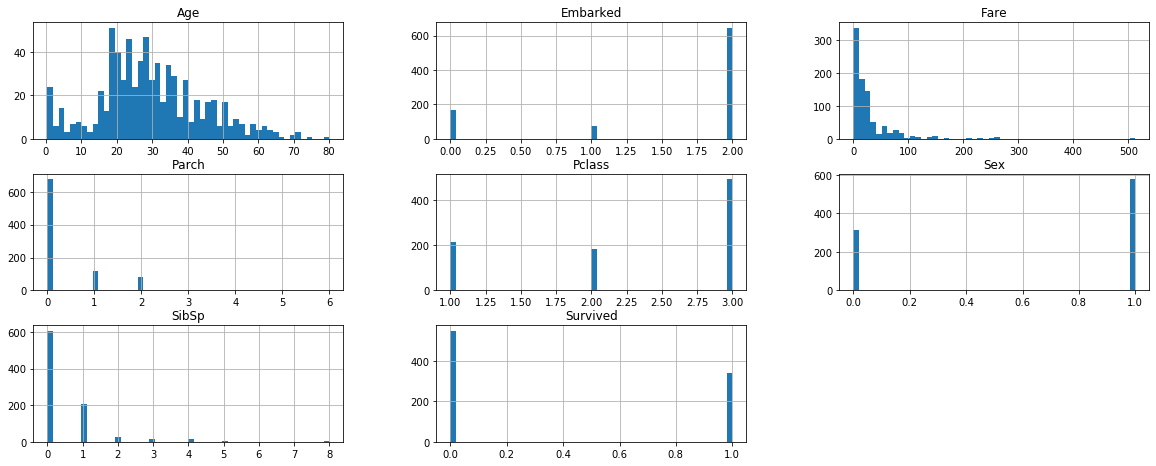

In [19]:
df.hist(figsize=(20,30), bins=50, layout=(11,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb295bee48>,
      dtype=object)

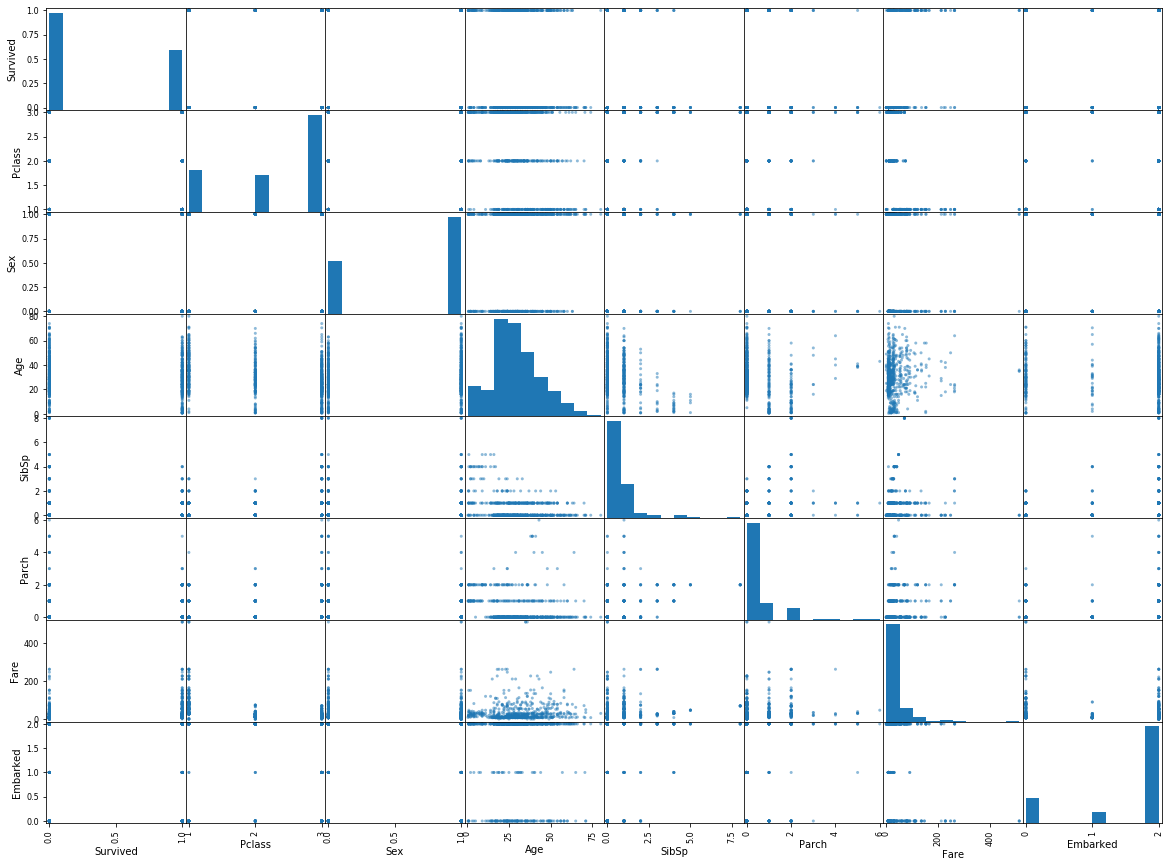

In [20]:
scatter_matrix(df, figsize=(20, 15))

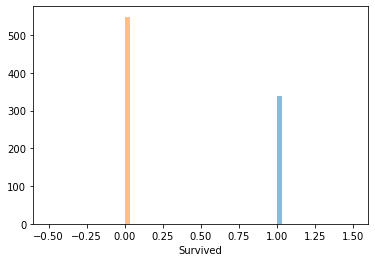

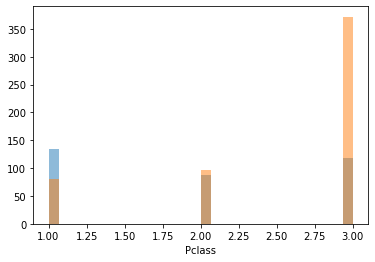

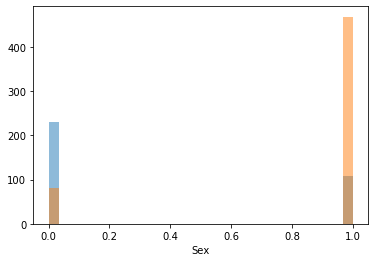

/home/jonas/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jonas/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


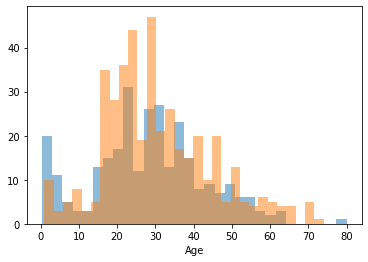

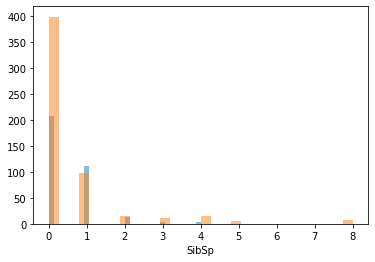

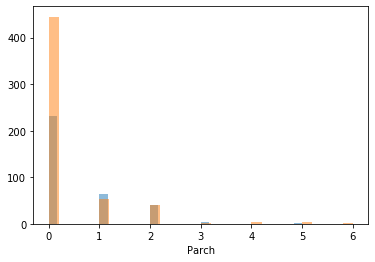

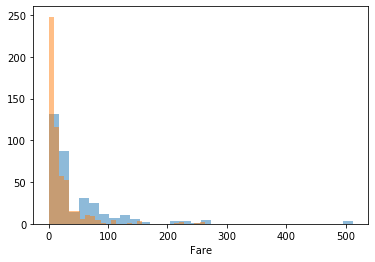

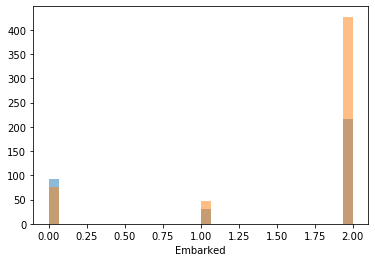

In [21]:
for i in df.columns:
    m = plt.hist(df[df["Survived"] == 1][i], bins=30, label = "survived", alpha=0.5)
    b = plt.hist(df[df["Survived"] == 0][i], bins=30, label = "died", alpha=0.5)
    plt.xlabel(i)
    plt.show()

In [22]:
df = df[df["Fare"] > 0]

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


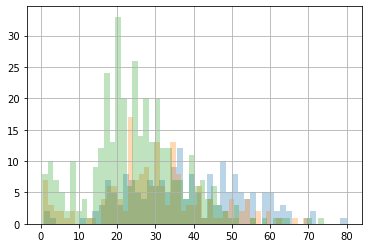

In [24]:
df[df["Pclass"] == 1]["Age"].hist(bins=50, label="first", alpha=0.3)
df[df["Pclass"] == 2]["Age"].hist(bins=50, label="second", alpha=0.3)
df[df["Pclass"] == 3]["Age"].hist(bins=50, label="third",alpha=0.3)

In [25]:
def mean_age(x):
    return np.mean(x)

In [26]:
mean_age(df[df["Pclass"] == 1]["Age"])

38.090718232044196

In [27]:
mean_age(df[df["Pclass"] == 2]["Age"])

29.87763005780347

In [28]:
mean_age(df[df["Pclass"] == 3]["Age"])

25.05960113960114

In [29]:
df.loc[df["Age"].isnull() & (df["Pclass"] == 3), "Age"] = 25.05960113960114

In [30]:
df.loc[df["Age"].isnull() & (df["Pclass"] == 2), "Age"] = 29.87763005780347

In [31]:
df.loc[df["Age"].isnull() & (df["Pclass"] == 1), "Age"] = 38.090718232044196

/home/jonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/jonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


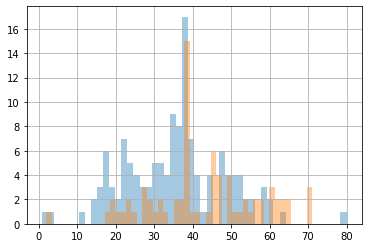

In [32]:
df[df["Pclass"] == 1][df["Survived"] == 1]["Age"].hist(bins=50, alpha = 0.4)
df[df["Pclass"] == 1][df["Survived"] == 0]["Age"].hist(bins=50, alpha = 0.4)

/home/jonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/jonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


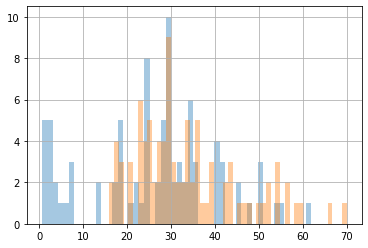

In [33]:
df[df["Pclass"] == 2][df["Survived"] == 1]["Age"].hist(bins=50, alpha = 0.4)
df[df["Pclass"] == 2][df["Survived"] == 0]["Age"].hist(bins=50, alpha = 0.4)

/home/jonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/jonas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


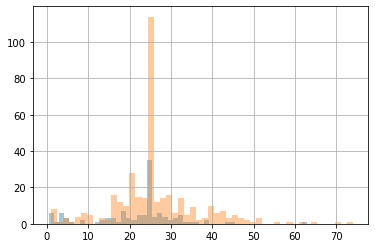

In [34]:
df[df["Pclass"] == 3][df["Survived"] == 1]["Age"].hist(bins=50, alpha = 0.4)
df[df["Pclass"] == 3][df["Survived"] == 0]["Age"].hist(bins=50, alpha = 0.4)

In [35]:
y_train = df["Survived"]
X_train = df.drop("Survived", axis=1)

# Dimensionality Reduction

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [37]:
pca = PCA(n_components=2)

In [38]:
X_train_pca = pca.fit_transform(X_train)

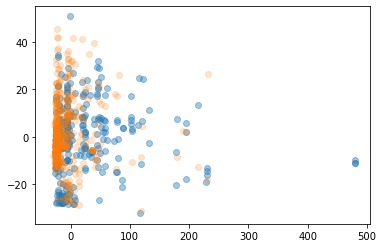

In [39]:
plt.scatter(X_train_pca[:,0][y_train==1], X_train_pca[:,1][y_train==1], alpha=0.4)
plt.scatter(X_train_pca[:,0][y_train==0], X_train_pca[:,1][y_train==0], alpha=0.2)

In [44]:
tsne = TSNE(n_components=2, random_state=5)
X_train_tsne = tsne.fit_transform(X_train)

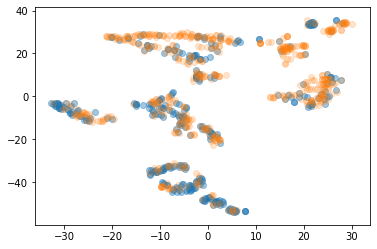

In [45]:
plt.scatter(X_train_tsne[:,0][y_train==1], X_train_tsne[:,1][y_train==1], alpha=0.4)
plt.scatter(X_train_tsne[:,0][y_train==0], X_train_tsne[:,1][y_train==0], alpha=0.2)

# Machine Learning Prototype

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [59]:
kfold = StratifiedKFold(n_splits=4, random_state=45, shuffle=True)
for train_i, test_i in kfold.split(X_train, y_train):
    inner_X_train, inner_y_train = X_train.iloc[train_i], y_train.iloc[train_i]
    inner_X_test, inner_y_test = X_train.iloc[test_i], y_train.iloc[test_i]
    forest = RandomForestClassifier()
    forest.fit(inner_X_train, inner_y_train)
    train_pred = forest.predict(inner_X_train)
    test_pred = forest.predict(inner_X_test)
    print(f1_score(inner_y_train, train_pred))
    print(f1_score(inner_y_test, test_pred))

0.9803149606299214
0.6875
0.9802371541501976
0.7976878612716763
0.984313725490196
0.7421383647798742
0.976190476190476
0.7514450867052023


### overfitting: make trees not as deep and plot learning curves!